# **Research question and Motivation**

<img src="Screenshots/c9.png" width='480'>

# Motivation
*   I really want to use this api which comes from HaveIbeenPwned because I personally had my private information stolen and part of large data breaches. Typically you can put your phone number or email and find if you have been the victim of a data breach or even multiple. One of the main proponents of data breaches are passwords because they are incredibly valuable especially given people resuse passwords.

*   HaveIbeenPwned allows you to search if a password has been breached and if so it provides the number of times it has been breached. So I found it interesting if I combined the idea of passwords and the names of the most famous athletes because I also like sports

# Topic at hand
* My hypothesis, is that athletes that are more famous are more likely to have some variation of their name used as a password. In other words, the more popular the athelte is, the more times that the corresponding passwords will show up under a data breach.(Assuming data breaches are mostly random) To represent fame, I aggregate different features ,such as total earning through endorsements, followers on social media and as well as the sport that they play.


A sha1 encoding of a password is a 20 byte hash value, used for checking authenticity. HIBP(HaveIbeenPwned) api provides a search by range by the first 5 bytes of the hash as the key and it outputs the remaining 15 bytes appended with a : and the number of data breaches corresponding to many passwords with the same key. After finding the transforming each name eg.cristanoronalod to cristianoronalado25, I can compute the hash and then call a get(url prepended with the first 5 characters of the sha1). The later 15 characters on the list indicates a hit.
![SegmentLocal](Screenshots/c3.gif "segment")

**Data Gathering**
===============
* I collected data from [Espn's world fame 100(2019)](https://www.espn.com/espn/feature/story/_/id/26113613/espn-world-fame-100-2019) which presents the 100 most famous athletes during 2019. I opted to use the selenium webdriver module because some of the html is java script loaded, so if I used get from the requests module, it would not show any of the information that I want. Afterwards, I did utlized beautiful soup to parse the html for thumbnails of the players.From the thumbnails, I was able to find, their name,(rating calculated by ESPN), total endorsements, follower count,sport and country.

<img src="Screenshots/c1.png" width='480'>

* Since the Espn website only provides 100 athletes, I figured it would be beneificial to find another website or data set to scrape. This was pretty difficult and lacked forsight as I was pigeonholed into athlete endorsement and followers statistics from 2019. Eventualli I found [opendorse's top 100 highest paid athletes](https://opendorse.com/blog/top-100-highest-paid-athlete-endorsers-2019/) This website included some new features such as a description,estimated value per social media post,and notable endorsement deals,so I decided to only take the features that overlapped with the additional athletes that were not previously listed. Furthermore I opted to drop the country and rating/search score columns from my dataFrame since that feature is unique to the Espn website.

**Data Cleaning**
===============

<img src="Screenshots/c5.png" width='480'>


# Endorsements and Followers

* In the Espn article, I needed to convert all columns to numeric. For the endorsements, I found that I could delete the \$ sign by taking a slice that omits the first character. For converting the suffix such as m to millions or k for thousands, I used a regular expression to extract the suffix and put it as its own column in the dataframe. Afterwards, I removed the suffix from the endorsements column and then replaced the now numeric value in endorsements corresponding to the value of the suffix multiplied by its current value.Lastly, I dropped the suffix columns because they were not neccesary. The followers was very similar to the endorsements, other than the fact that It does not need the removal of the $ sign.
-----------------
`df['suffix1']=df['endorsements'].str.extract(r'([mk])+')`  \Extract suffix

`df['endorsements']=(df['endorsements'].str[1:].replace(r'[mk]+$','',regex=True))` \remove suffix



-------------------------------------------------------------------------------------------------------

`df['endorsements']=pandas.to_numeric(df['endorsements'],errors='coerce')`

`df.loc[df['suffix1']=='m','endorsements']=df['endorsements']*10**6`                \Calculate actual value

`df.loc[df['suffix1']=='k','endorsements']=df['endorsements']*10**3`                 \Calculate actual value

# Categorical data cleaning (name,sport,country)
* For the general case, I found that categorical data was appended with a bunch of white space characters, especially tabs, so I used the lambda strip to strip all white space characters.
`df[df.columns]=df.apply(lambda x: x.str.strip())` \\strip white space characters
* For the sport, I used a replace to delete the unicode bullet that was prepended to every sport, but I also suppose I could have just taken a slice of the string.
`df['sport']=df['sport'].str.replace('•','')`       \\remove bullet point


**Data Cleaning(Cont...)**
===============

<img src="Screenshots/c6.png" width='480'>

# Endorsements and Followers

* For the endorsements, I split the string with : as the delimeter and took the 1st element, then I took a slice that excluded the dollar sign and removed all comma marks. For the twitter followers, I also split the string with the : delimeter and took the 1st element and then did the same technique I used on the ESPN website by extracting the suffix and multipliying it's equivalent value by the numeric value of the root. The one difference is that this website uses, the capital M and capital K for the suffixes, so I had to change my regular expression.
----------
`endorsements2=(en.text).split('$')[1].replace(',','').strip()` \remove \$ sign and commas


# Categorical features(name, sport)

* To get the name, I also use split, but with the | as the delimeter and the first occurance of a period as the delimeter. I also made the decision to remove all dashes,commas and periodsd in names, such as in Otto Porter, Jr. to simplify their names.

* In the sport, they did not explcitly put the sport, such as in the Espn article, so I did found all the unique leagues, such as ATP and PGA tour and replaced them with their respective sport. I got the sport from getting the element after the | delimeter in the name.
-------------------------
`name2=player_thumbnail2.text.split('|')[0].split('.',1)[1].strip().replace(' ','-').replace('.','-').replace(',','-').lower()` \name

-------------------------------
`df2['sport'].replace('La Liga','Soccer',inplace = True)`   \These are only two of several

`df2['sport'].replace('ATP Tour','Tennis',inplace = True)`


In [1]:
import warnings
import matplotlib
import pandas as pd
from athletes_df import *

warnings.filterwarnings('ignore')

df=create_df()
df['total_breaches']=0
df['unique_breaches_by_name']=0
df['name'].replace('-','',regex=True,inplace = True)

f= open('breaches.txt','r')
for line in f.readlines():
    breached_data = line.split(':')
    df.set_index('name')
    df.loc[df['name']==(breached_data[0].strip()),'total_breaches']+=int(breached_data[2].strip())
    df.loc[df['name']==(breached_data[0].strip()),'unique_breaches_by_name']+=1
f.close()

f= open('breaches2.txt','r')
for line in f.readlines():
    breached_data = line.split(':')
    df.set_index('name')
    df.loc[df['name']==(breached_data[0].strip()),'total_breaches']+=int(breached_data[2].strip())
    df.loc[df['name']==(breached_data[0].strip()),'unique_breaches_by_name']+=1
f.close()

df=df.drop(columns={'rating','country'},inplace = True)
print(df.head(150))

KeyError: 'endorsements'

Distribuition of total_breaches
===============================

count       157.000000
mean       3047.745223
std       21070.626616
min           0.000000
25%           5.000000
50%          45.000000
75%         424.000000
max      228149.000000
Name: total_breaches, dtype: float64


<AxesSubplot:title={'center':'Distribution of total_breaches'}, xlabel='name'>

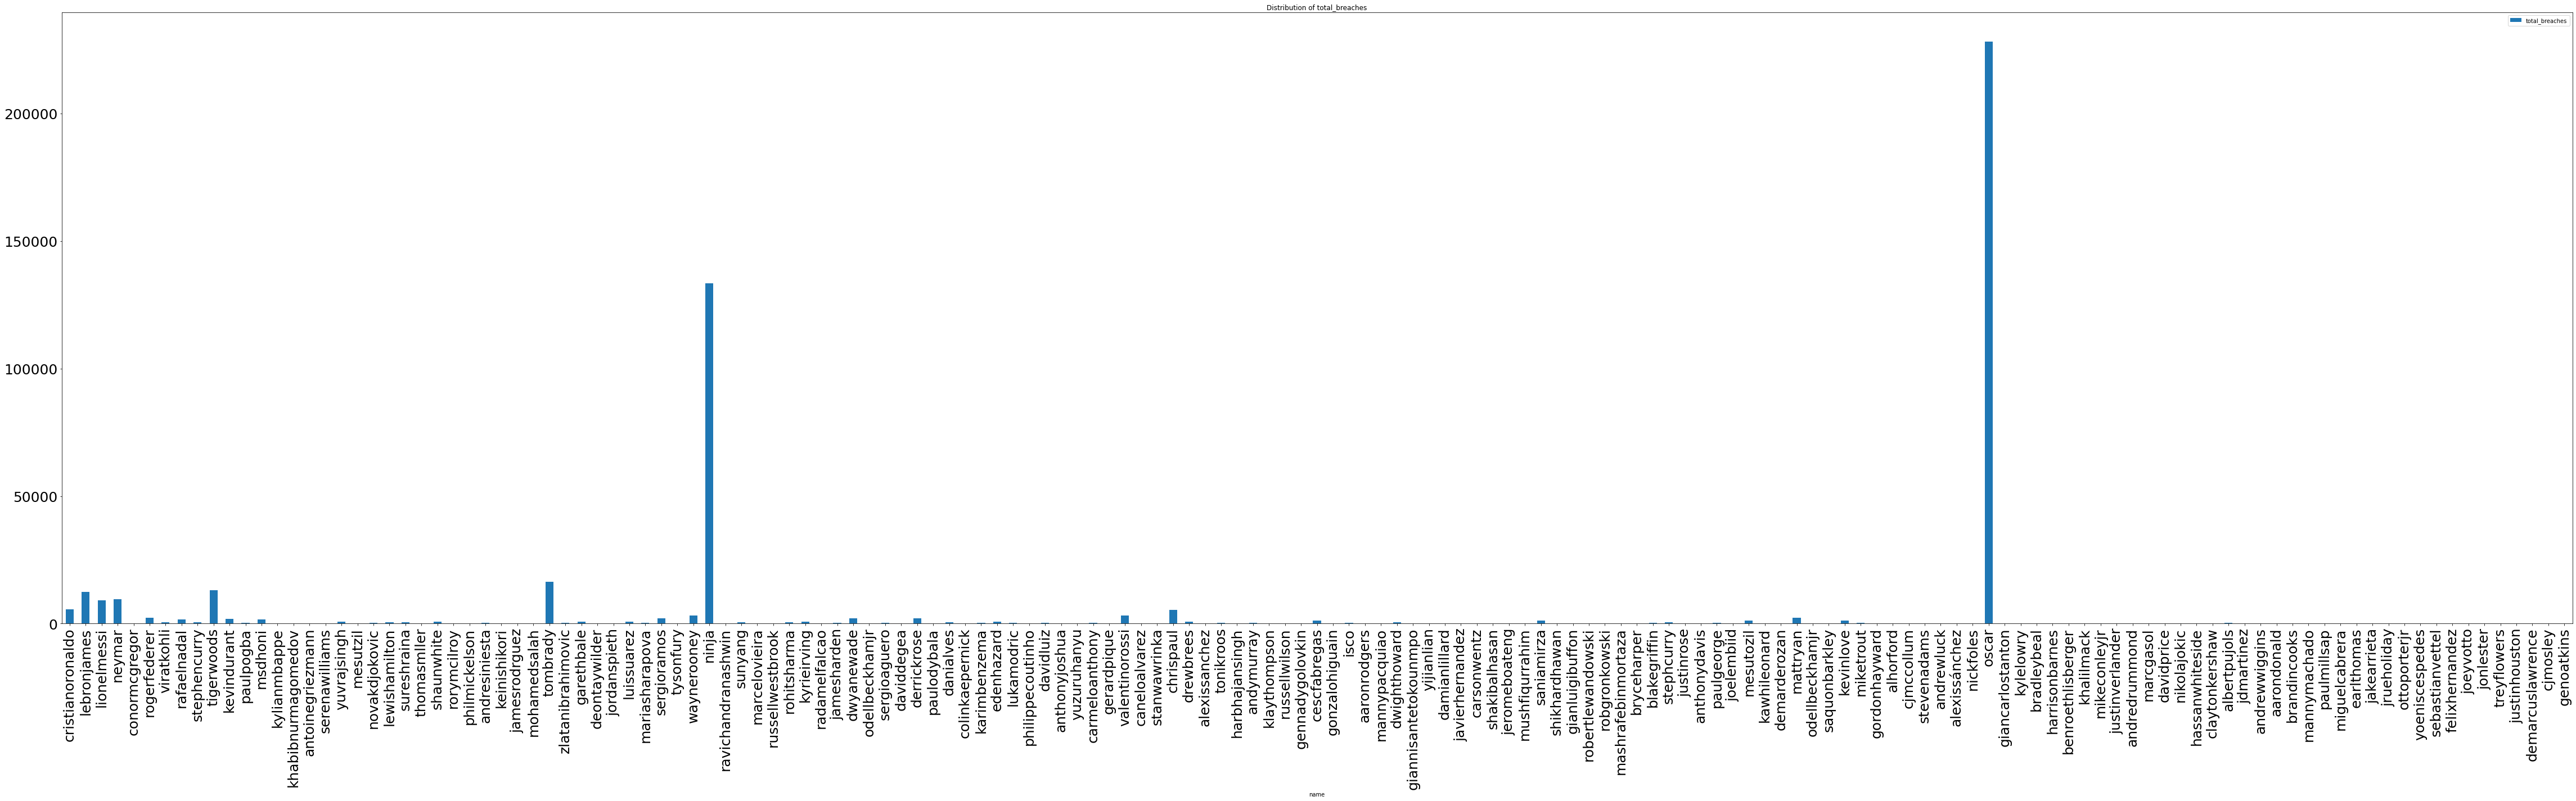

In [ ]:
print(df['total_breaches'].describe())
df.plot(kind='bar',x='name',y='total_breaches',fontsize='25',figsize=(80,20),title='Distribution of total_breaches',legend = True)

* Let's drop ninja because he is a very common dictionary wordfirst name with no last name, making then both extreme outliers. Hopefully after this, or graph will depict some sort of trend and will have a significantly lower standard deviation

In [ ]:
df=df.drop(df.index[df['name']=='ninja'])
df=df.drop(df.index[df['name']=='oscar'])

New Distribution of total_breaches
==================================

count      155.000000
mean       755.096774
std       2288.819031
min          0.000000
25%          4.500000
50%         42.000000
75%        412.500000
max      16390.000000
Name: total_breaches, dtype: float64


<AxesSubplot:title={'center':'New Distribution of total_breaches'}, xlabel='name'>

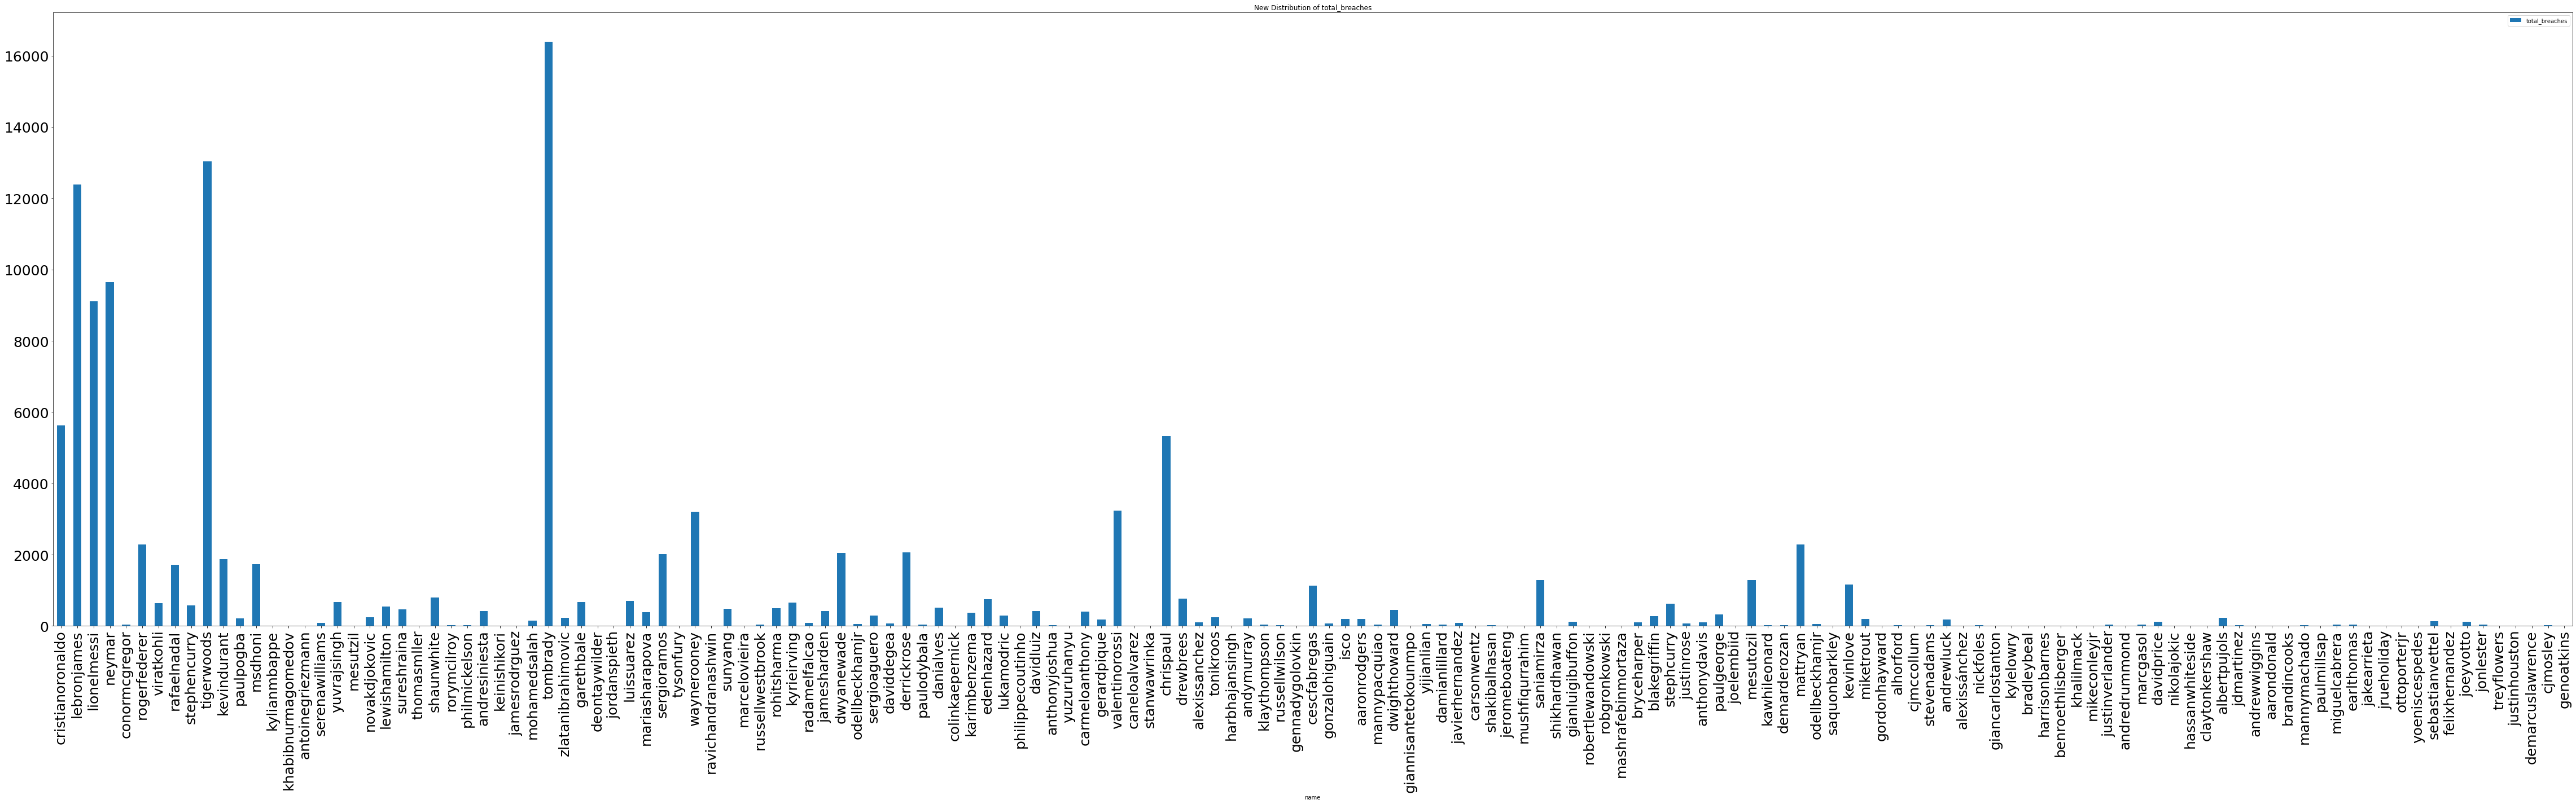

In [ ]:
print(df['total_breaches'].describe())
df.plot(kind='bar',x='name',y='total_breaches',fontsize='25',figsize=(80,20),title='New Distribution of total_breaches',legend = True)

**As you can see, this graph looks like a better scale and it depicts a positive skewedness. If we look at the describe, the median is only 1/18 of the mean and the standard deviation is much larger than the mean which indicates high variability. It is also notable that tombrady has an exceptionally high data_breaches amongst its peers and it is the global maximum, despite being closer to the middle of the chart. Since my dataset exhibits high variablity I've opted to not removing tom brady although it is almost 7 standard deviations above the mean.**

Follower Count vs. Total_breaches
==================================

count    1.550000e+02
mean     1.148475e+07
std      1.868983e+07
min      0.000000e+00
25%      6.510000e+05
50%      5.400000e+06
75%      1.495000e+07
max      1.480000e+08
Name: followers, dtype: float64


<AxesSubplot:title={'center':'Follower Count vs Total_breaches'}, xlabel='followers'>

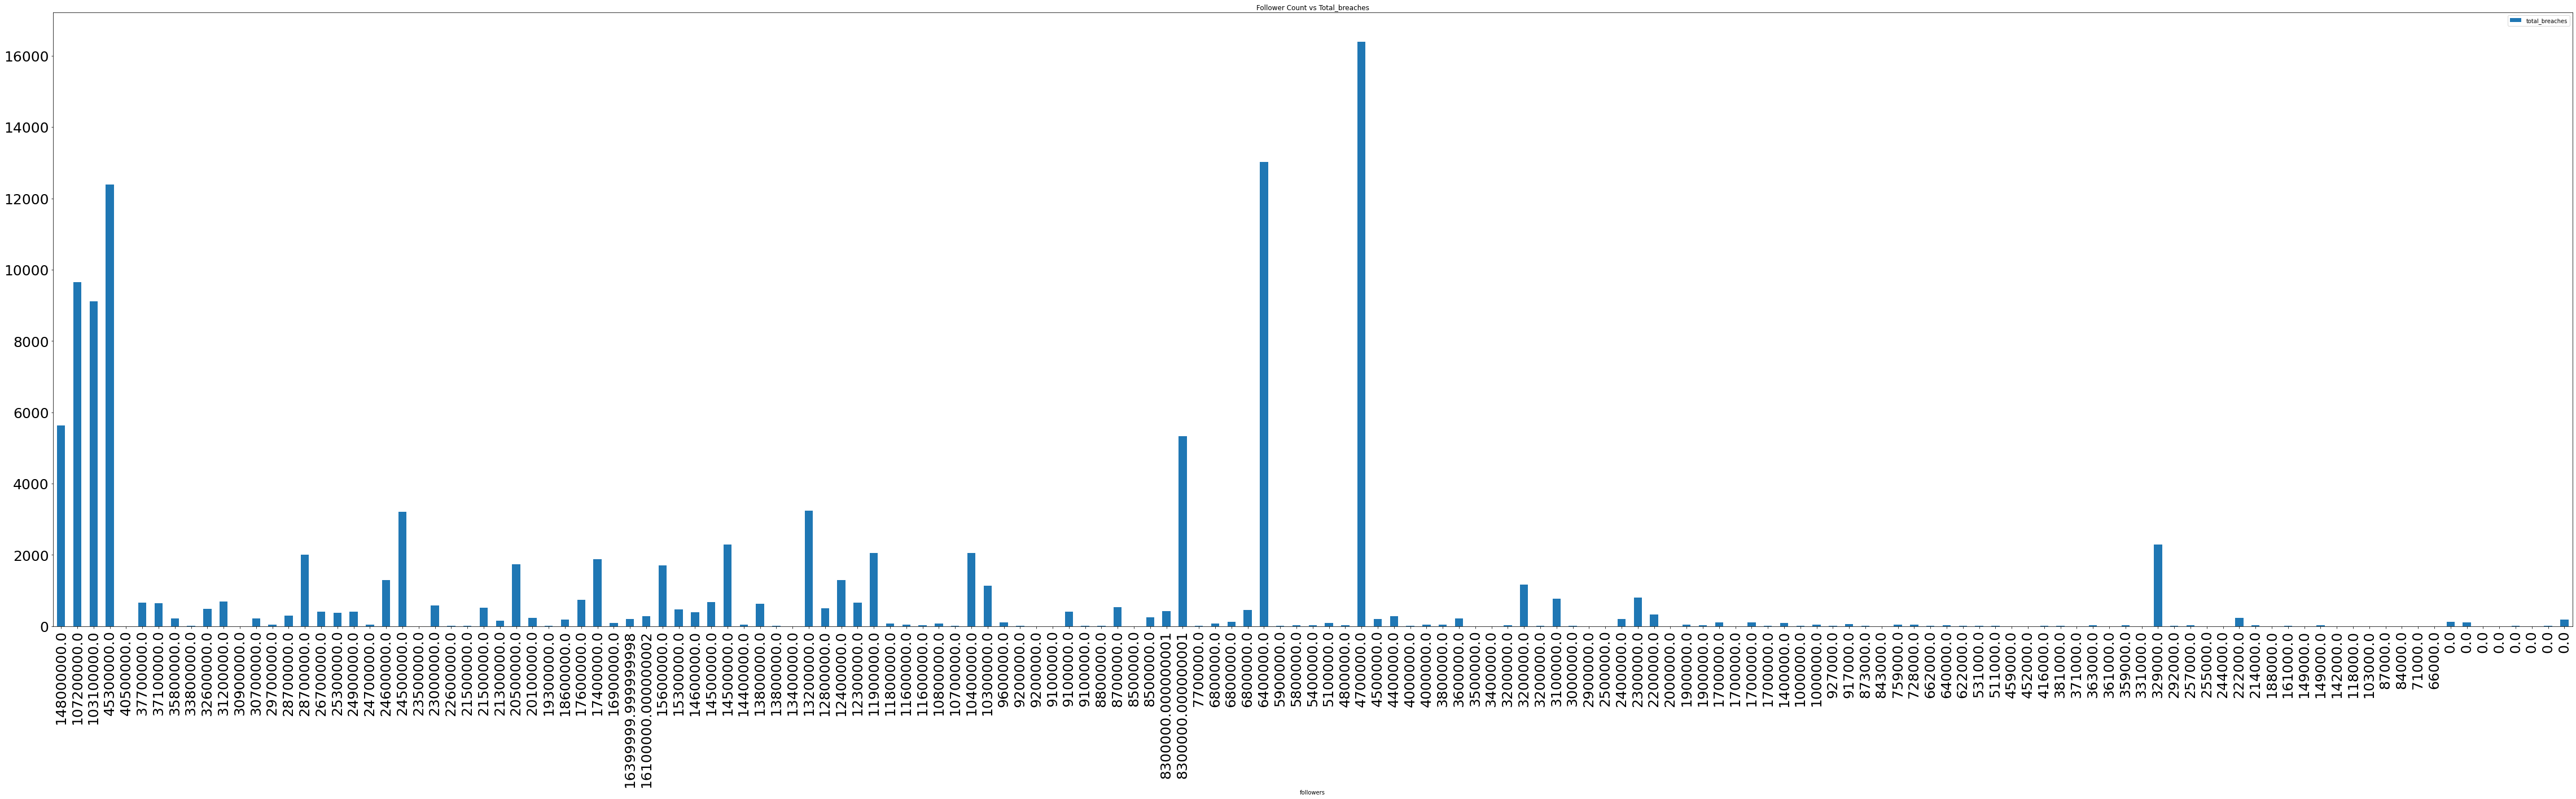

In [ ]:
print(df['followers'].describe())
df2=df.sort_values(by='followers',ascending=False)
df2.plot(kind='bar',x='followers',y='total_breaches',fontsize='25',figsize=(80,20),title='Follower Count vs Total_breaches',legend = True)
#print(df2[df2['followers'].isna()])

**This model is not as clear.**

Endorsements vs. Total_breaches
==================================

count    1.550000e+02
mean     9.856613e+06
std      1.109161e+07
min      7.500000e+04
25%      2.065000e+06
50%      5.500000e+06
75%      1.320500e+07
max      5.200000e+07
Name: endorsements, dtype: float64


<AxesSubplot:title={'center':'Endorsements vs Total_breaches'}, xlabel='endorsements'>

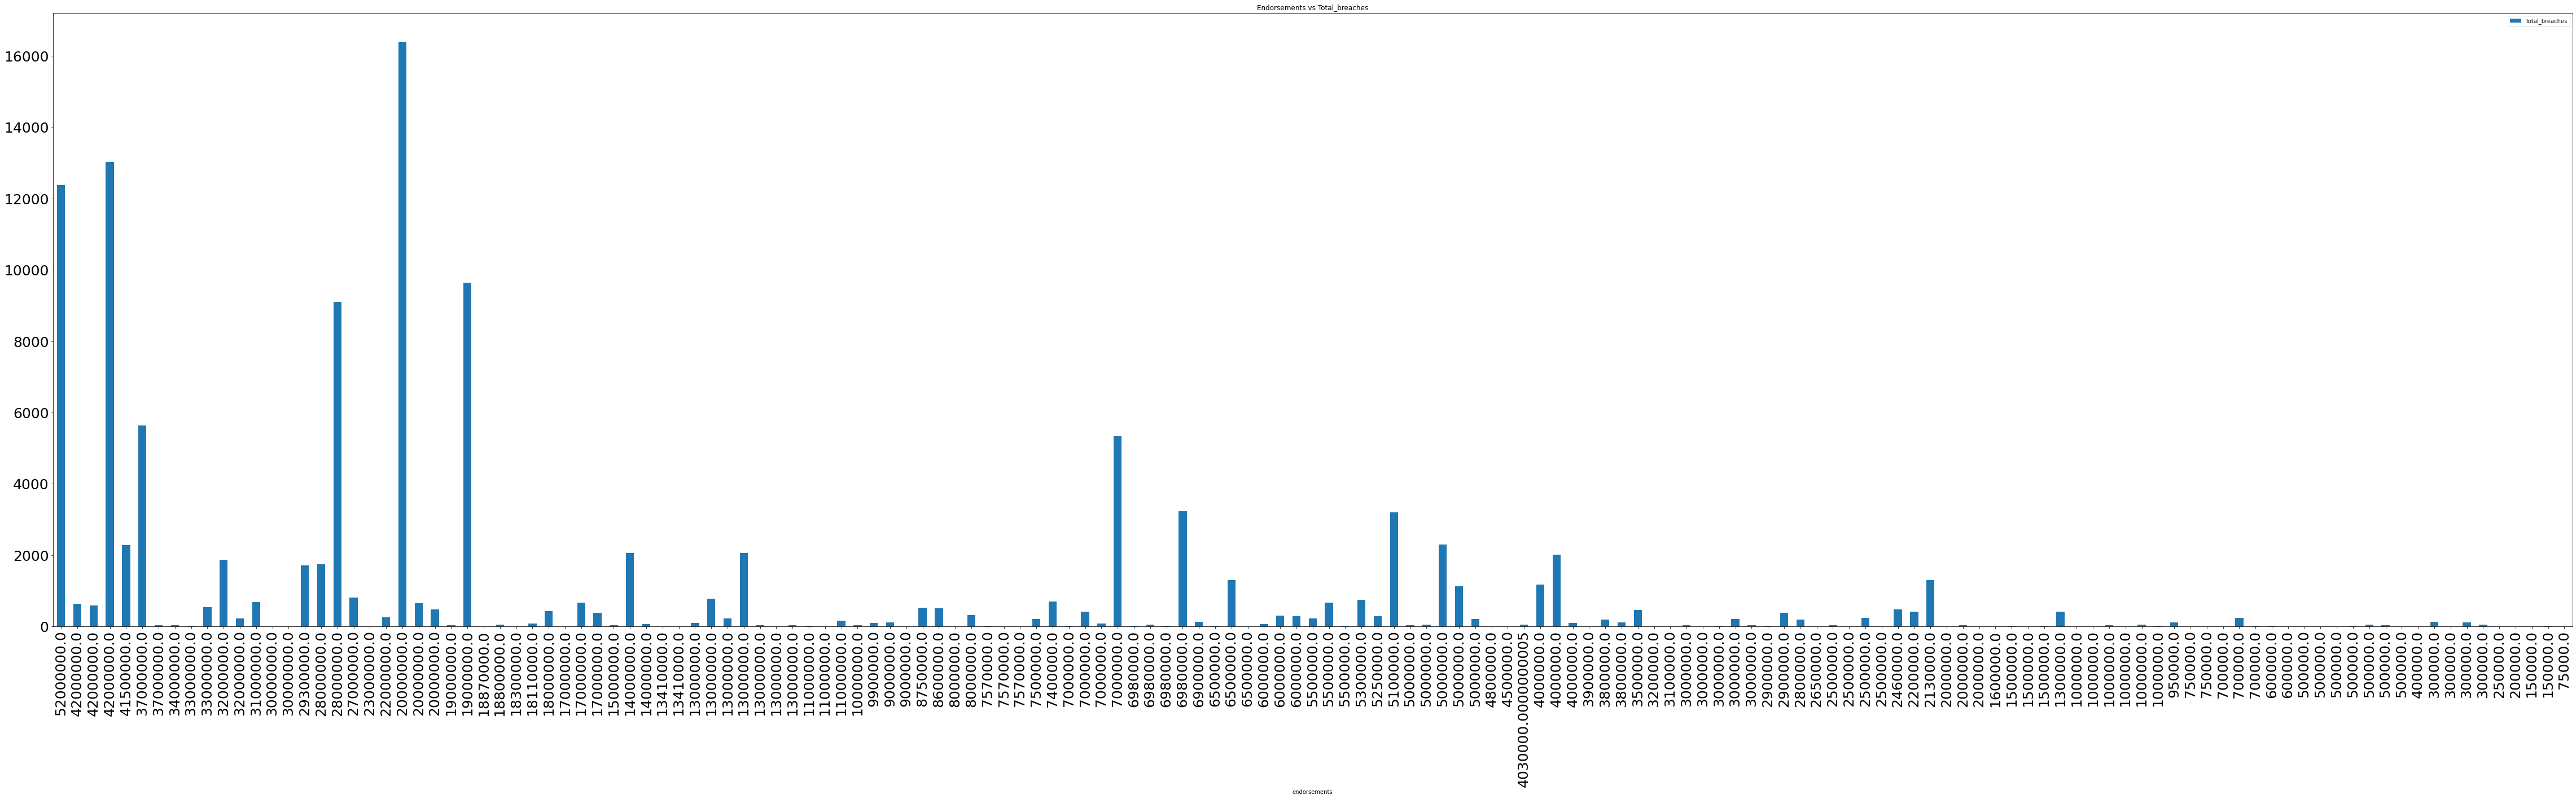

In [ ]:
print(df['endorsements'].describe())
df3=df.sort_values(by='endorsements',ascending=False)
df3.plot(kind='bar',x='endorsements',y='total_breaches',fontsize='25',figsize=(80,20),title='Endorsements vs Total_breaches',legend = True)